<a href="https://colab.research.google.com/github/Larissa-Rocha/imersao-dados-alura/blob/main/Larissa_M_H_Rocha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados do ENEM 2019 - Bahia

O objetivo dessa análise é explorar os dados do ENEM 2019 no estado da Bahia, testar hipóteses e gerar visualizações. Para isto, será utilizada a linguagem Python e sua bibliotecas Pandas, numpy, Matplotlib e Seaborn.

In [ ]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#acessando a base de dados
estado = "ba"

In [ ]:
uri = f"https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/por%20estado/{estado}.csv.zip?raw=true"
arquivo = f'{estado}.csv.zip'
!wget -O $arquivo $uri

--2020-10-25 22:12:58--  https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/por%20estado/ba.csv.zip?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/alura-cursos/imersao-dados-2-2020/raw/master/por%20estado/ba.csv.zip [following]
--2020-10-25 22:12:58--  https://github.com/alura-cursos/imersao-dados-2-2020/raw/master/por%20estado/ba.csv.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/por%20estado/ba.csv.zip [following]
--2020-10-25 22:12:59--  https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/por%20estado/ba.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githu

In [ ]:
#lendo os dados
dados = pd.read_csv(arquivo, delimiter=';')
dados.head()

,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,29873,190001034501,2019,2910800,Feira de Santana,29,BA,32,M,0,2,1,2910800.0,Feira de Santana,29.0,BA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,EEDCBDDDADBECBACCBADCDAACDBEEEAAAABBECDEABECB,AEBAE99999ABCABCCDAEDDDBDAAADCDEDEDCAEDEBDCCCD...,NaN,0,NaN,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,NaN,1.0,140.0,120.0,160.0,80.0,120.0,620.0,H,E,A,B,4,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,B,B
1,34139,190001038767,2019,2931608,Teolândia,29,BA,22,M,1,3,1,2931608.0,Teolândia,29.0,BA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,B,B,4,C,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,C,A,A,B
2,58800,190001063429,2019,2910727,Eunápolis,29,BA,25,F,2,2,1,2910727.0,Eunápolis,29.0,BA,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,CADCABABDEACD..ACDBABBBCCCAAAEAABBCCDCCEDABBB,99999CEACACACDBCBB*DBAACEBEEBCEEBCAADBEAABBCCC...,ACBCBCDABAACBBACBABCDEACBBBACA*BD*EABABBDCABA,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,120.0,120.0,120.0,120.0,80.0,560.0,H,B,F,B,6,A,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,B,A,A,A
3,58853,190001063482,2019,2927408,Salvador,29,BA,42,F,1,3,1,1501402.0,Belém,15.0,PA,1,13,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,CADDCEDACCDADAADDEBBCEDDECBCEBACCBBBDCBEABCBD,BDCAA99999BBCCBDEAAECADBDAAADCACDBDCCAEEBDECEC...,CBBECDDBCCACEBDCABDCADEDBCBCAEDBCEAABDCBACBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,120.0,120.0,100.0,120.0,60.0,520.0,E,E,B,B,2,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,91306,190001095935,2019,2911105,Formosa do Rio Preto,29,BA,20,F,1,3,1,2911105.0,Formosa do Rio Preto,29.0,BA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,CBEADBABABEECCECAECAAAECADEBCDEDBCDCBCADBABCE,99999DDABBDCDDEDAADEDEEECBEBECEAAEAADDEAAEDBEC...,ADECADECBEABAECAEBABDCCDEAEEBCAECDDECCABCEEDB,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,100.0,120.0,120.0,120.0,0.0,460.0,A,A,A,A,4,A,A,B,D,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A


In [ ]:
dados.shape

(398095, 137)

## Levantamento de informações sobre os inscritos

In [ ]:
#média de idades dos candidatos
dados['NU_IDADE'].mean()

22.693917281051004

In [ ]:
#número de inscritos por cidade
dados['NO_MUNICIPIO_RESIDENCIA'].value_counts()

Salvador                88557
Feira de Santana        25200
Vitória da Conquista    13250
Camaçari                 8759
Juazeiro                 8135
                        ...  
Caatiba                    66
Jucuruçu                   57
Ibiquera                   50
Catolândia                 50
Lajedinho                  45
Name: NO_MUNICIPIO_RESIDENCIA, Length: 417, dtype: int64

Text(0.5, 1.0, 'Sexo dos inscritos')

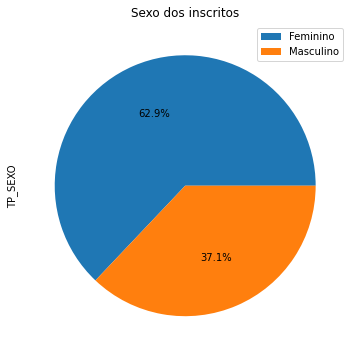

In [ ]:
#proporção de inscritos por sexo
dados['TP_SEXO'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', labels=None, figsize=(8,6))

plt.legend(['Feminino', 'Masculino'])
plt.title('Sexo dos inscritos')

Note que a maioria dos inscritos é do sexo feminino, o que combina com o fato das mulheres serem maioria no ensino superior brasileiro [confira](https://www.bbc.com/portuguese/geral-49639664/)

---



In [ ]:
#vamos ver a distribuição de notas por sexo

def notasSexo(dados, notaProva):
  nomes = {
  "NU_NOTA_MT": "Matemática",
  "NU_NOTA_LC": "Linguagens e códigos",
  "NU_NOTA_CN": "Ciências da natureza",
  "NU_NOTA_CH": "Ciências humanas",
  "NU_NOTA_REDACAO": "Redação"}

  plt.figure(figsize=(8,6))
  sns.histplot(dados, x = notaProva, hue = 'TP_SEXO', stat='density', kde=True)
  plt.xlabel("Notas")
  plt.ylabel('Frequência')
  plt.title('Notas da prova de ' + nomes[notaProva] +' ENEM 2019 - Bahia')
  plt.legend(['Feminino', 'Masculino'])

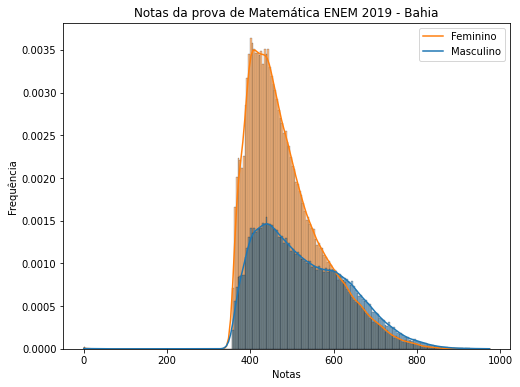

In [ ]:
#nota de matemática
notasSexo(dados, 'NU_NOTA_MT')

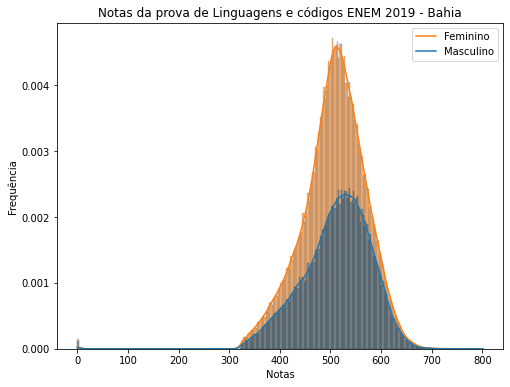

In [ ]:
#nota de liguagens
notasSexo(dados, 'NU_NOTA_LC')

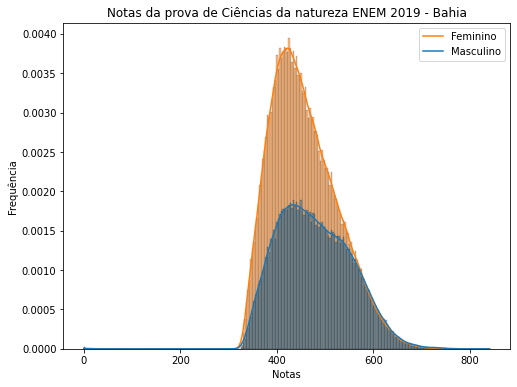

In [ ]:
#nota de ciências da natureza
notasSexo(dados, 'NU_NOTA_CN')

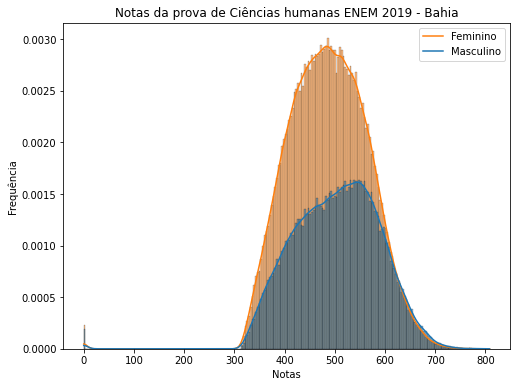

In [ ]:
#nota de ciências humanas
notasSexo(dados, 'NU_NOTA_CH')

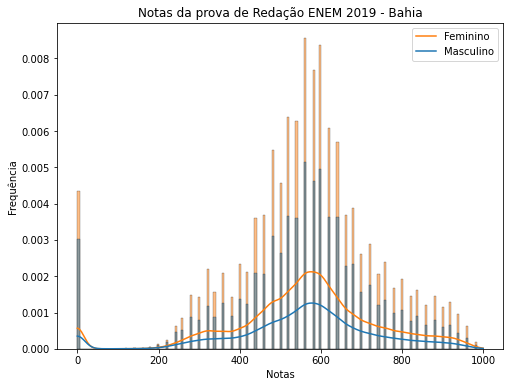

In [ ]:
#nota de redação
notasSexo(dados, 'NU_NOTA_REDACAO')

Text(0.5, 1.0, 'Tipo de escola do ensino médio')

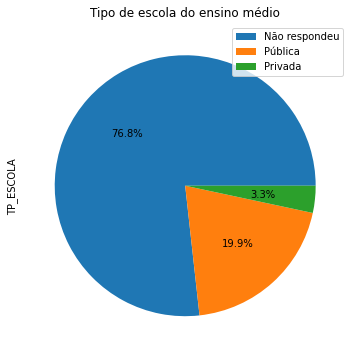

In [ ]:
#tipo de escola do ensino médio (pública, privada, exterior)
dados['TP_ESCOLA'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', labels=None, figsize=(8,6))

plt.legend(['Não respondeu', 'Pública', 'Privada'])
plt.title('Tipo de escola do ensino médio')

A maioria não respondeu o tipo de escola, e tivemos mais inscritos da escola pública do que da particular, no entanto, devido a quantidade de candidatos que não respondeu, não é possível tirar nenhuma conclusão.

[Text(0, 0, 'Nunca estudou'),
 Text(0, 0, 'Até 5º ano fund.'),
 Text(0, 0, 'Até 9º ano Fund.'),
 Text(0, 0, 'Ensino médio incompl.'),
 Text(0, 0, 'Ensino médio compl.'),
 Text(0, 0, 'Graduação'),
 Text(0, 0, 'Pós-graduação'),
 Text(0, 0, 'Não sabe')]

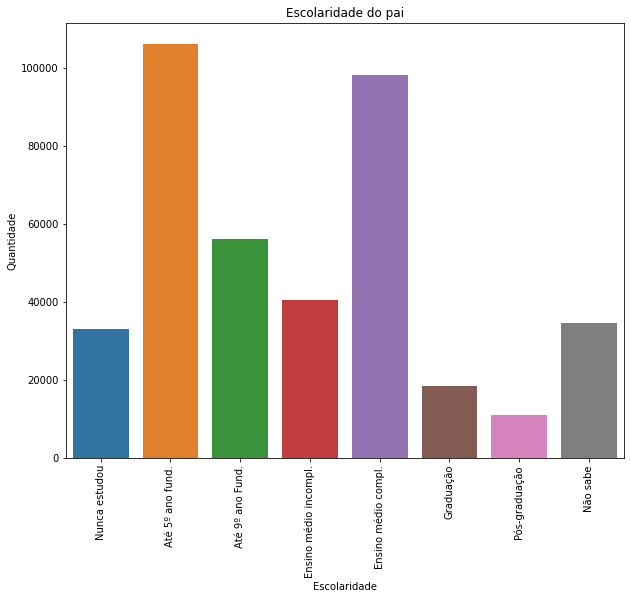

In [ ]:
#escolaridade do pai (ou homem responsável)

plt.figure(figsize=(10,8))
ordem = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
g = sns.countplot(x='Q001', data=dados, order=ordem)
plt.xlabel("Escolaridade")
plt.ylabel('Quantidade')
plt.title('Escolaridade do pai')
g.set_xticks(range(8))
g.set_xticklabels(['Nunca estudou', 'Até 5º ano fund.', 'Até 9º ano Fund.','Ensino médio incompl.', 'Ensino médio compl.', 'Graduação', 'Pós-graduação', 'Não sabe'], rotation=90)

[Text(0, 0, 'Nunca estudou'),
 Text(0, 0, 'Até 5º ano fund.'),
 Text(0, 0, 'Até 9º ano Fund.'),
 Text(0, 0, 'Ensino médio incompl.'),
 Text(0, 0, 'Ensino médio compl.'),
 Text(0, 0, 'Graduação'),
 Text(0, 0, 'Pós-graduação'),
 Text(0, 0, 'Não sabe')]

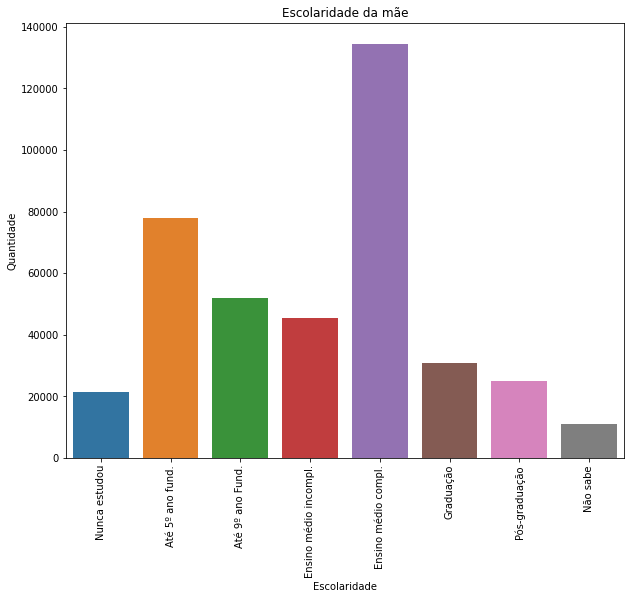

In [ ]:
#escolaridade da mãe (ou mulher responsável)

plt.figure(figsize=(10,8))
ordem = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
g = sns.countplot(x='Q002', data=dados, order=ordem)
plt.xlabel("Escolaridade")
plt.ylabel('Quantidade')
plt.title('Escolaridade da mãe')
g.set_xticks(range(8))
g.set_xticklabels(['Nunca estudou', 'Até 5º ano fund.', 'Até 9º ano Fund.','Ensino médio incompl.', 'Ensino médio compl.', 'Graduação', 'Pós-graduação', 'Não sabe'], rotation=90)

Essa análise nos leva a formular a primeira hipótese: A escolaridade dos pais influencia nas notas dos candidatos?

[Text(0, 0, 'Não declarada'),
 Text(0, 0, 'Branca'),
 Text(0, 0, 'Preta'),
 Text(0, 0, 'Parda'),
 Text(0, 0, 'Amarela'),
 Text(0, 0, 'Indígena')]

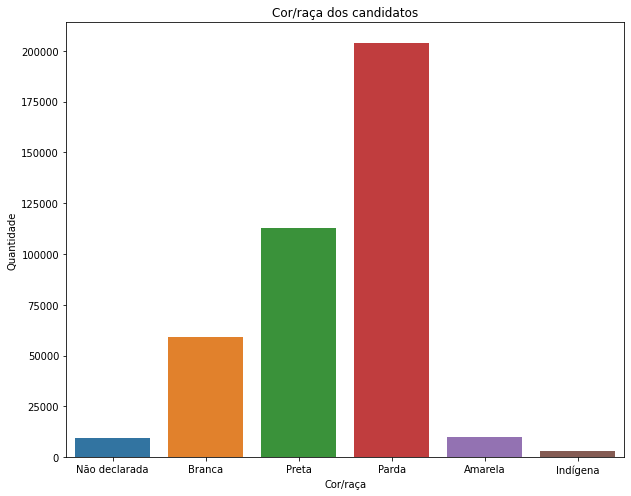

In [ ]:
#Cor/raça dos candidatos

plt.figure(figsize=(10,8))
ordem = [0, 1, 2, 3, 4, 5]
g = sns.countplot(x='TP_COR_RACA', data=dados, order=ordem)
plt.xlabel("Cor/raça")
plt.ylabel('Quantidade')
plt.title('Cor/raça dos candidatos')
g.set_xticks(range(6))
g.set_xticklabels(['Não declarada', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena'])

A nossa segunda hipóte vai buscar entender como a questão racial se reflete nas notas.

*   Para analisar melhor os dados, vamos excluir do dataframe os candidatos faltosos e eliminados, deixando apenas os presentes nas provas.

In [ ]:
#conferindo que quem falta ou é eliminado recebe NaN como nota

dados.query("TP_PRESENCA_CN == 0")["NU_NOTA_CN"]

0        NaN
1        NaN
11       NaN
13       NaN
19       NaN
          ..
398083   NaN
398089   NaN
398090   NaN
398091   NaN
398092   NaN
Name: NU_NOTA_CN, Length: 108017, dtype: float64

In [ ]:
dados.query("TP_PRESENCA_CN == 2")["NU_NOTA_CN"]

13866    NaN
17706    NaN
19015    NaN
19558    NaN
24080    NaN
          ..
379923   NaN
382894   NaN
390452   NaN
391884   NaN
397779   NaN
Name: NU_NOTA_CN, Length: 113, dtype: float64

In [ ]:
#excluindo as linhas que apresentam NaN para as notas das provas

notas_provas = ['NU_NOTA_REDACAO', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH']
dados.dropna(axis=0, inplace=True, subset=notas_provas)

In [ ]:
dados[notas_provas].head()

,NU_NOTA_REDACAO,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH
2,560.0,443.5,368.4,490.1,422.9
3,520.0,545.1,422.8,425.6,405.7
4,460.0,470.6,419.0,397.4,473.3
5,500.0,413.7,404.2,444.3,404.9
6,340.0,521.5,402.0,493.9,488.8


In [ ]:
#criando uma nova coluna com a nota total (soma de toas as notas)

#soma de todas as notas de cada inscrito
dados[notas_provas].sum(axis=1)
#adicionando esta coluna no dataframe
dados['NU_NOTA_TOTAL'] = dados[notas_provas].sum(axis=1)
notas_provas.append('NU_NOTA_TOTAL')

## Avaliando as notas com base na escolaridade dos pais

Vimos que para a maioria dos candidatos, a escolaridade da mãe era ensino médio completo, e do pai era até o 5º ano do fundamental. Vamos gerar boxplots com as notas dos alunos com relação à escolaridade dos pais

[Text(0, 0, 'Nunca estudou'),
 Text(0, 0, 'Até 5º ano fund.'),
 Text(0, 0, 'Até 9º ano Fund.'),
 Text(0, 0, 'Ensino médio incompl.'),
 Text(0, 0, 'Ensino médio compl.'),
 Text(0, 0, 'Graduação'),
 Text(0, 0, 'Pós-graduação'),
 Text(0, 0, 'Não sabe')]

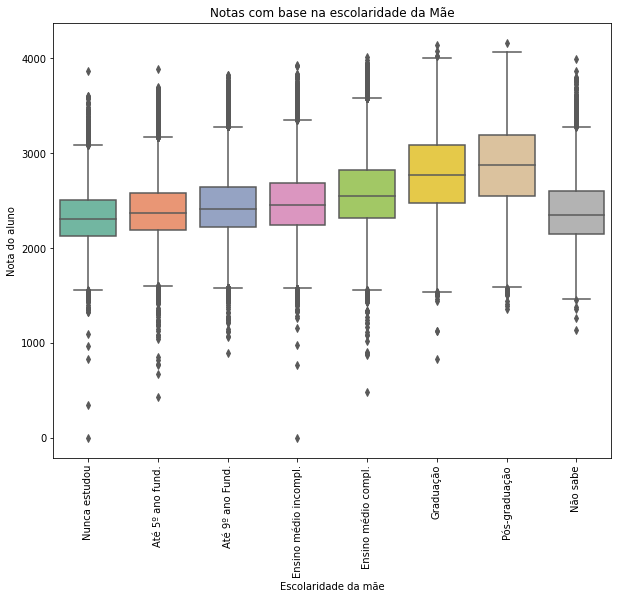

In [ ]:
#Boxplot da escolaridade da mãe

ordem = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
plt.figure(figsize=(10,8))
g = sns.boxplot(x = 'Q002', y = 'NU_NOTA_TOTAL', data = dados, palette="Set2", order=ordem)
plt.xlabel("Escolaridade da mãe")
plt.ylabel('Nota do aluno')
plt.title('Notas com base na escolaridade da Mãe')
g.set_xticks(range(8))
g.set_xticklabels(['Nunca estudou', 'Até 5º ano fund.', 'Até 9º ano Fund.','Ensino médio incompl.', 'Ensino médio compl.', 'Graduação', 'Pós-graduação', 'Não sabe'], rotation=90)


[Text(0, 0, 'Nunca estudou'),
 Text(0, 0, 'Até 5º ano fund.'),
 Text(0, 0, 'Até 9º ano Fund.'),
 Text(0, 0, 'Ensino médio incompl.'),
 Text(0, 0, 'Ensino médio compl.'),
 Text(0, 0, 'Graduação'),
 Text(0, 0, 'Pós-graduação'),
 Text(0, 0, 'Não sabe')]

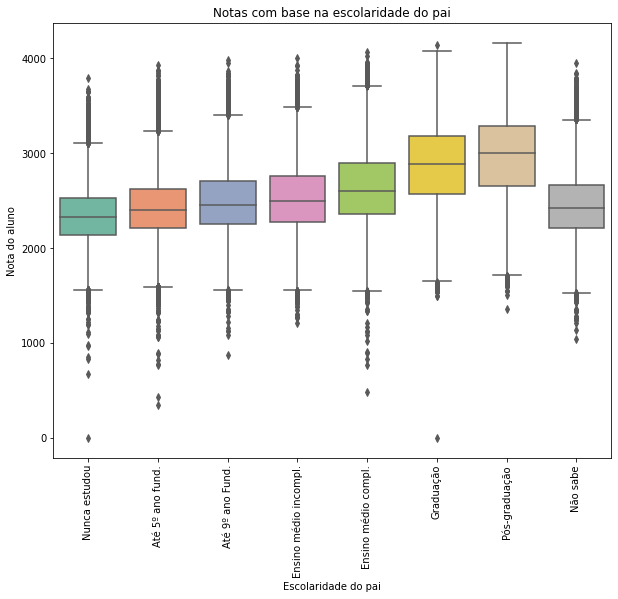

In [ ]:
#Boxplot da escolaridade do pai

ordem = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
plt.figure(figsize=(10,8))
g = sns.boxplot(x = 'Q001', y = 'NU_NOTA_TOTAL', data = dados, palette="Set2", order=ordem)
plt.xlabel("Escolaridade do pai")
plt.ylabel('Nota do aluno')
plt.title('Notas com base na escolaridade do pai')
g.set_xticks(range(8))
g.set_xticklabels(['Nunca estudou', 'Até 5º ano fund.', 'Até 9º ano Fund.','Ensino médio incompl.', 'Ensino médio compl.', 'Graduação', 'Pós-graduação', 'Não sabe'], rotation=90)

## Avaliando as notas por cor/raça

Segundo dados da Pesquisa Nacional por Amostra de Dominícios Contínua (2018), a população da Bahia era 81,1% formada por pretos e pardos [confira](https://g1.globo.com/ba/bahia/noticia/2019/05/22/uma-em-cada-5-pessoas-na-bahia-se-declara-preta-aponta-ibge.ghtml), esse dado se reflete nos inscritos do ENEM. Mas será que as notas possuem diferenças entre raças?

In [ ]:
raca = dados['TP_COR_RACA'].unique()
raca.sort()
print(raca)

[0 1 2 3 4 5]


In [ ]:
def BoxplotNotas(raca, notaProva, dados, **kwargs):

  nomes = {
  "NU_NOTA_MT": "Matemática",
  "NU_NOTA_LC": "Linguagens e códigos",
  "NU_NOTA_CN": "Ciências da natureza",
  "NU_NOTA_CH": "Ciências humanas",
  "NU_NOTA_REDACAO": "Redação"}

  plt.figure(figsize=(10,8))
  g = sns.boxplot(x = raca, y = notaProva, data = dados, palette="husl")
  plt.xlabel("Cor/Raça")
  plt.ylabel('Nota')
  plt.title('Notas da prova de ' + nomes[notaProva] +' ENEM 2019 - Bahia')
  g.set_xticks(range(6))
  g.set_xticklabels(['Não declarada', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena'])


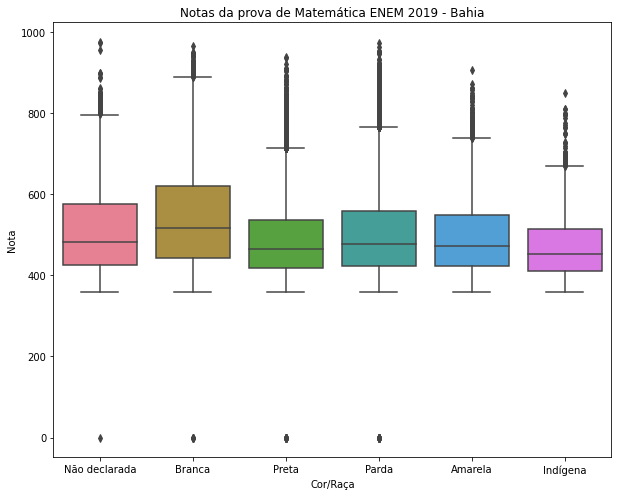

In [ ]:
BoxplotNotas('TP_COR_RACA', 'NU_NOTA_MT', dados) #matemática

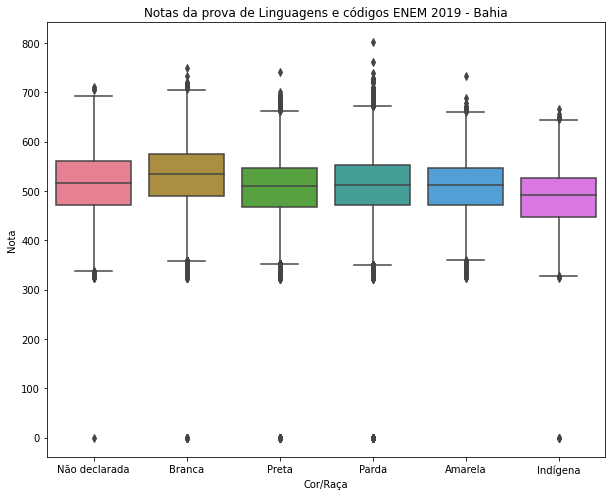

In [ ]:
BoxplotNotas('TP_COR_RACA', 'NU_NOTA_LC', dados) #linguagem

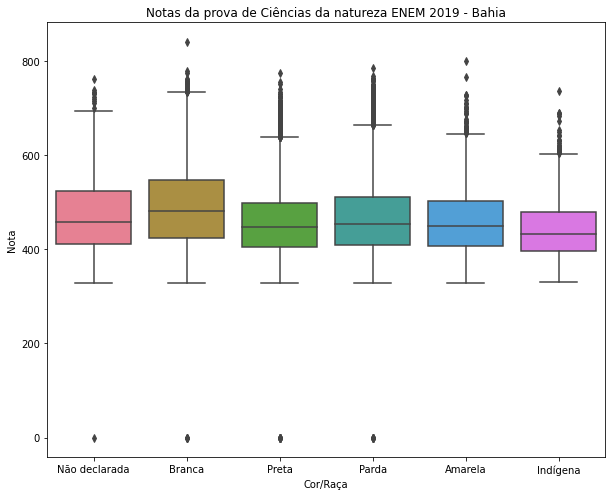

In [ ]:
BoxplotNotas('TP_COR_RACA', 'NU_NOTA_CN', dados) #ciências da natureza

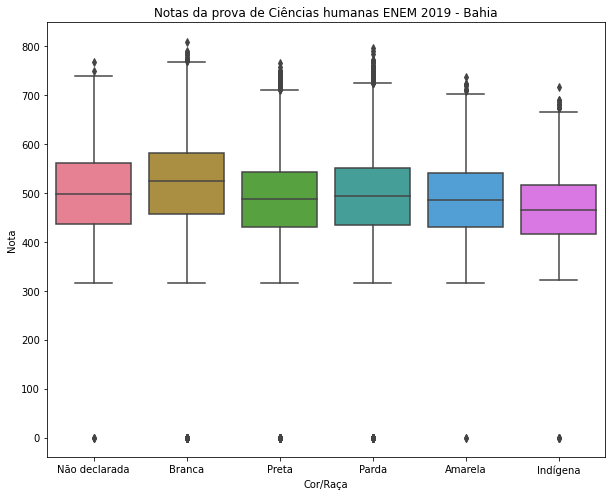

In [ ]:
BoxplotNotas('TP_COR_RACA', 'NU_NOTA_CH', dados) #ciências humanas

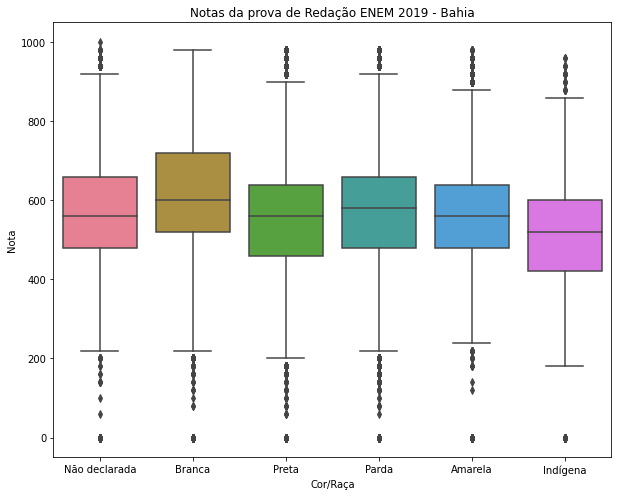

In [ ]:
BoxplotNotas('TP_COR_RACA', 'NU_NOTA_REDACAO', dados) #redação

## Conclusões




*   O número de participantes do sexo feminino é maior do que o do sexo masculino;
*   A escolaridade mais comum do pai do candidato é até o 5º ano do fundamental e da mãe é ensino médio completo;
*   Os boxplots das notas por escolaridade do pai e da mãe mostraram que a nota média dos alunos aumenta com a escolaridade dos pais;
*   A maioria dos candidatos se declarou parda;
*   Os boxplots das notas por raça mostrou que os candidatos brancos tinham média maior nas notas de todas as provas, apesar da população da Bahia ser, em sua maioria, preta ou parda, evidenciando grande desigualdade racial.





